In [1]:
#importing liabraries

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
#loading table
df=pd.read_csv(r'C:\Users\user\Downloads\website database.csv')
df.head()


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044


In [3]:
#checking for null values
df.isnull().sum()


# ----------------------------------------    0
Unnamed: 1                                    0
Unnamed: 2                                    0
Unnamed: 3                                    0
Unnamed: 4                                    0
Unnamed: 5                                    0
Unnamed: 6                                    0
Unnamed: 7                                    0
Unnamed: 8                                    0
Unnamed: 9                                    0
dtype: int64

In [4]:
#changing heading of table
df.columns=df.iloc[0]
df

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
3,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044
...,...,...,...,...,...,...,...,...,...,...
3178,Unassigned,2024042806,0,1,0,0,0,2,0,2
3179,Unassigned,2024043005,0,1,0,0,0,2,0,2
3180,Unassigned,2024043006,0,1,0,0,0,2,0,2
3181,Unassigned,2024050105,0,1,0,0,0,2,0,2


In [5]:
#dropping row '0' and renaming heading
df=df.drop(index=0).reset_index(drop = True)
df.columns=["channel group","DateHour","users","sessions","Engaged sessions","Average engagement time per session","Engaged sessions per user",
            "Events per session	","Engagement rate","Event count"]
df.head()

,channel group,DateHour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
2,Direct,2024041723,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.91855204,0.64,4.529411765,0.50678733,1001


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   users                                3182 non-null   object
 3   sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per user            3182 non-null   object
 7   Events per session	                  3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [7]:
#changing type of datehour
df["DateHour"]= pd.to_datetime(df["DateHour"],format="%Y%m%d%H",errors='coerce')
df.head()

,channel group,DateHour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.52666667,0.607594937,4.673333333,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737828,0.634615385,4.29588015,0.494382022,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416,0.611702128,4.587982833,0.493562232,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.668449198,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.91855204,0.64,4.529411765,0.50678733,1001


In [8]:
#assigning accurate types to all 
numeric_cols=df.columns.drop(["channel group","DateHour"])
df[numeric_cols]=df[numeric_cols].apply(pd.to_numeric,errors='coerce')
df["Hour"]=df["DateHour"].dt.hour
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   users                                3182 non-null   int64         
 3   sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session	                  3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

,channel group,DateHour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [9]:
df.describe()

,DateHour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


## 1) What patterns or trends can you observe in website sessions and users over time?

 

In [10]:
sb.set(style='whitegrid')

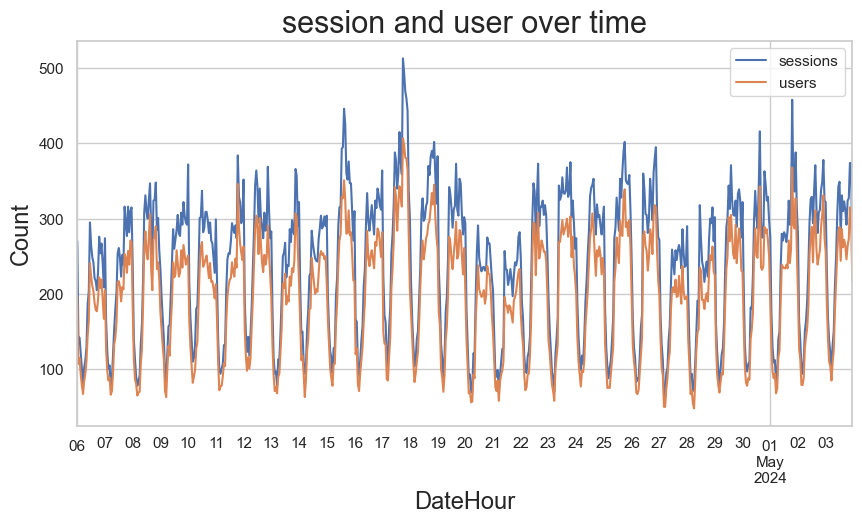

In [39]:
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["sessions","users"]].sum().plot(ax=plt.gca())
plt.title("session and user over time",fontsize=22)
plt.xlabel("DateHour",fontsize=17)
plt.ylabel("Count",fontsize=17)
plt.savefig("session and user over time")
plt.show()

### 🔍 Analysis
-Sessions are consistently higher than users, showing repeat visits.

-Noticeable spikes on April 15–19, likely due to a campaign or event.

-Traffic follows a daily pattern, with regular peaks and drops.

-Post-spike, sessions and users show a slightly stable upward trend.




## 2)Which marketing channel brought the highest number of users to the website and how can we use this insight to improve traffic from other sources?

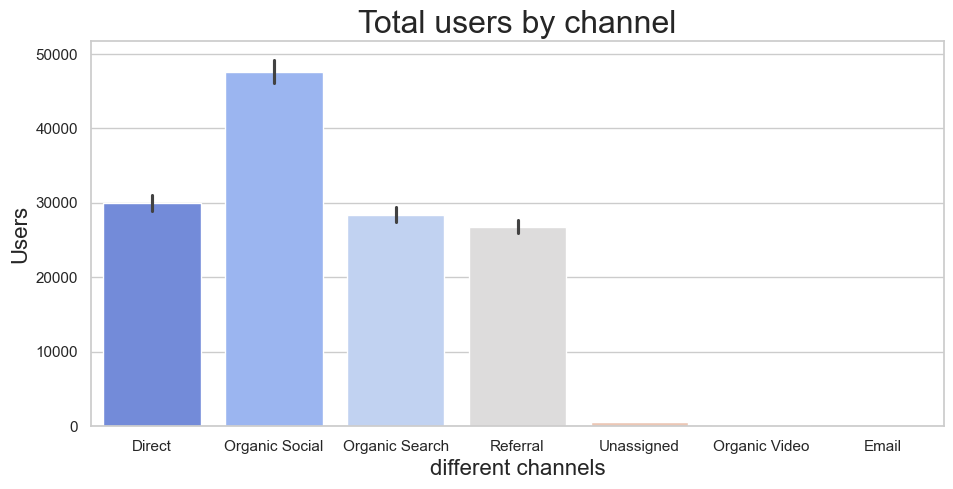

In [38]:
plt.figure(figsize=(11,5))
sb.barplot(data=df,x='channel group',y="users",estimator=np.sum,palette="coolwarm",hue="channel group")
plt.title("Total users by channel",fontsize=23)
plt.xlabel("different channels",fontsize=16)
plt.ylabel("Users",fontsize=16)
plt.savefig("Total users by channel")
plt.show()

### 🔍 Analysis
-organic social brought the most users -strong performance 

-email and video need better stratergy

-focus on improving low-performing channels

-search and direct works but can be improved


## 3) Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

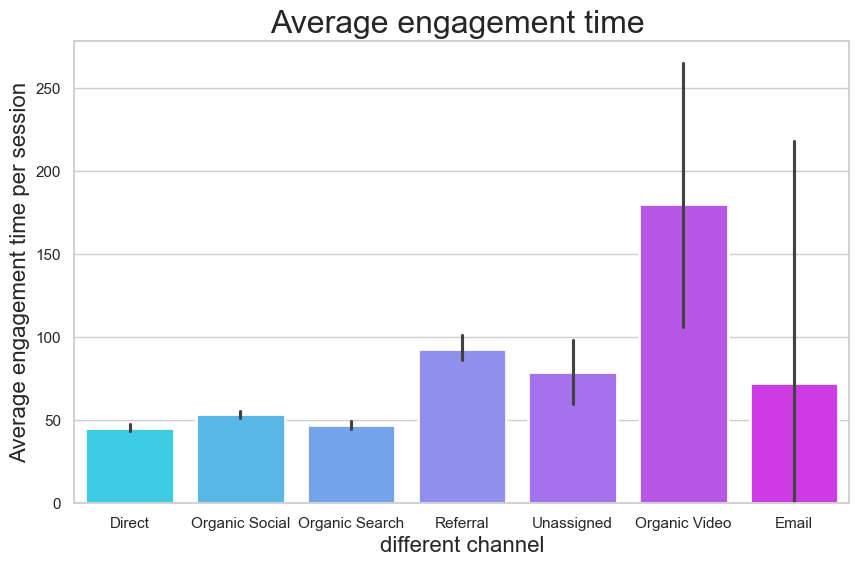

In [37]:
plt.figure(figsize=(10,6))
sb.barplot(data=df,x='channel group',y="Average engagement time per session",estimator=np.mean,palette="cool",
           hue="channel group",linewidth=2)
plt.title("Average engagement time ",fontsize=23)
plt.xlabel("different channel",fontsize=16)
plt.ylabel("Average engagement time per session",fontsize=16)
plt.savefig("Total users by channel")
plt.show()

### 🔍 Analysis
Organic Video showed the highest average engagement time, indicating strong content effectiveness.

Referral and Email also performed well in keeping users engaged.

Direct and Organic Search had lower engagement, suggesting less user interaction.

Focus on video content can help boost engagement across other channels.



In [14]:
df.head(3)



,channel group,DateHour,users,sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session\t,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23


## 4) How does engagement rate vary across different traffic channels?

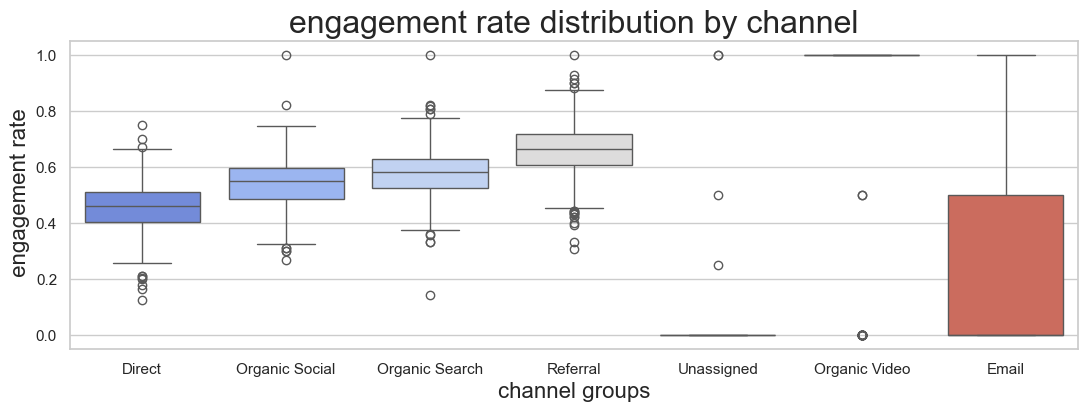

In [33]:
plt.figure(figsize=(13,4))
sb.boxplot(data=df,x="channel group",y='Engagement rate',palette='coolwarm',hue='channel group')
plt.title('engagement rate distribution by channel',fontsize=23)
plt.xlabel("channel groups",fontsize=16)
plt.ylabel(" engagement rate",fontsize=16)
plt.savefig('engagement rate distribution by channel')
plt.show()

### 🔍 Analysis
Referral and Organic Search channels show the highest median engagement rate, indicating consistent user interaction.

Organic Social and Direct have moderate engagement but wider variability.

Unassigned and Organic Video have low and inconsistent engagement rates.

Email has a broad range, suggesting mixed user behavior.

Focus on Referral & Organic Search for scalable, high-engagement traffic.



## 5) Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

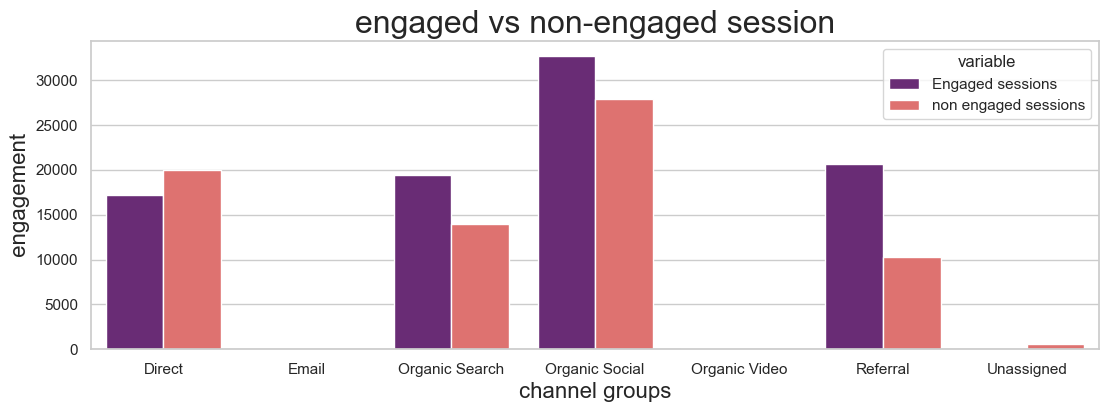

In [32]:
session_df=df.groupby('channel group')[['sessions','Engaged sessions']].sum().reset_index()
session_df['non engaged sessions']=session_df['sessions']-session_df['Engaged sessions']
session_df_melted=session_df.melt(id_vars="channel group",value_vars=["Engaged sessions","non engaged sessions"])
                                  
plt.figure(figsize=(13,4))
sb.barplot(data=session_df_melted,x="channel group",y="value",palette='magma',hue='variable')
plt.title('engaged vs non-engaged session',fontsize=23)
plt.xlabel("channel groups",fontsize=16)
plt.ylabel(" engagement ",fontsize=16)
plt.savefig('engaged vs non-engaged session')
plt.show()

#### ✅ Engaged vs Non-Engaged Sessions – Key Insights
Organic Social has the highest engagement – strong performance.

Email and Referral also show more engaged than non-engaged sessions.

Direct and Organic Search have more non-engaged users – needs improvement.

Unassigned traffic is minimal and mostly unengaged.

Organic Video shows no data – could be inactive or untracked

## 6) At what hours of the day does each channel drive the most traffic?

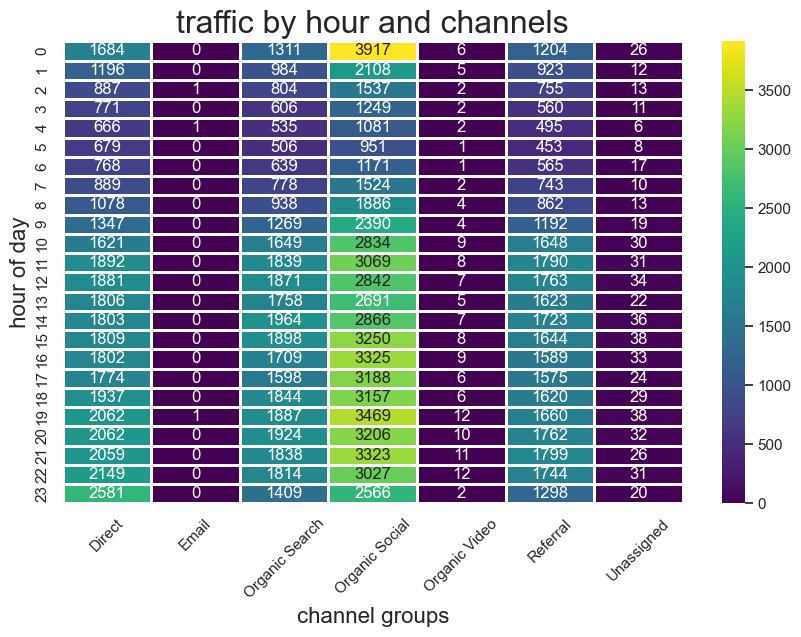

In [29]:
heatmap_data =df.groupby(["Hour","channel group"])["sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(10,6))
sb.heatmap(heatmap_data,cmap="viridis",linewidth=1,annot=True,fmt='.0f')
plt.title('traffic by hour and channels',fontsize=23)
plt.xlabel("channel groups",fontsize=16)
plt.ylabel(" hour of day ",fontsize=16)
plt.xticks(rotation=45)
plt.savefig('traffic by hour and channel')
plt.show()


### 🕒 Traffic by Hour and Channel – Key Insights
Peak traffic occurs between 11 AM to 6 PM across most channels.

Organic Social shows consistently high traffic, especially around 1 PM to 4 PM.

Email campaigns perform best around 12 PM, with a major spike.

Organic Search drives traffic mostly between 11 AM to 3 PM.

Referral and Direct channels have steady traffic throughout the day, peaking slightly around 2 PM to 4 PM.

Unassigned and Organic Video channels have minimal impact across all hours.

Recommendation: Schedule key campaigns and posts between 11 AM – 4 PM for maximum visibility and engagement.

## 7) Is there any correlation between high traffic (sessions) and high engagement rate over time?

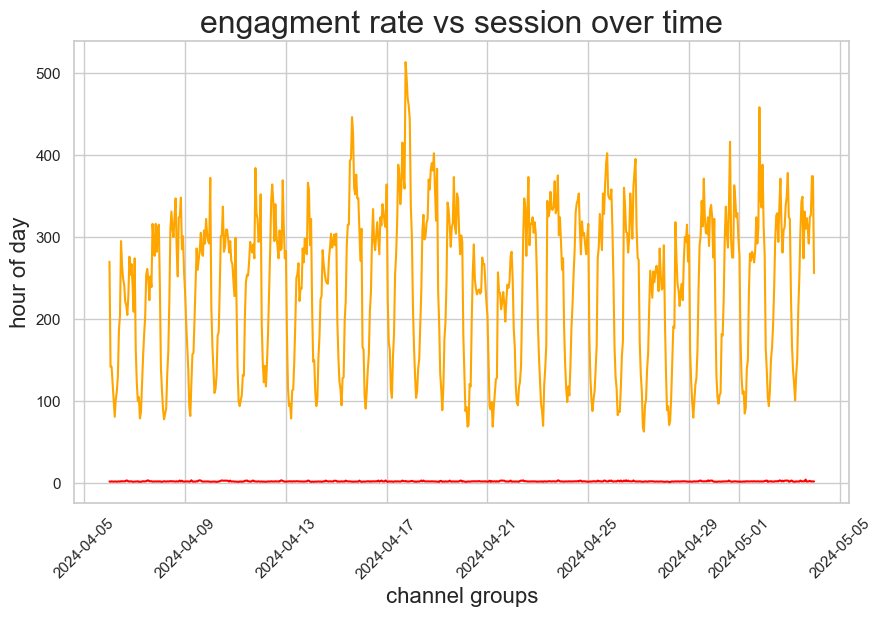

In [28]:
df_plot =df.groupby('DateHour')[['Engagement rate',"sessions"]].sum().reset_index()

plt.figure(figsize=(10,6))
plt.plot(df_plot['DateHour'],df_plot['Engagement rate'],label="engagment rate",color='red')
plt.plot(df_plot['DateHour'],df_plot['sessions'],label="sessions",color='orange')
plt.title('engagment rate vs session over time',fontsize=23)
plt.xlabel("channel groups",fontsize=16)
plt.ylabel(" hour of day ",fontsize=16)
plt.xticks(rotation=45)
plt.savefig('traffic by hour and channel.png')
plt.show()

### 📈 Correlation Between Sessions & Engagement Rate – Key Insights
Sessions (orange line) show frequent spikes, indicating high traffic variation across dates.

Engagement rate (red line) remains mostly flat and low throughout the observed period.

There is no strong correlation between high traffic and high engagement — even when session counts rise, engagement doesn't significantly increase.

Conclusion: High traffic does not guarantee high engagement. Focus on content quality and user experience to boost engagement rate.